In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

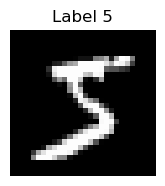

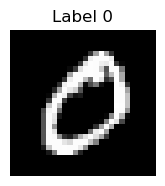

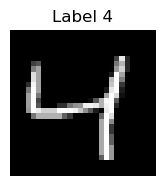

In [3]:
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mnist.load_data()[0][0][i], cmap='gray')
    plt.title(f"Label {mnist.load_data()[0][1][i]}")
    plt.axis('off');
    plt.show()
    
plt.show()

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

'''We normalize the value of each pixel as it contains pixel brightness only, 
i.e. the data takes the value from 0 to 1. Without normalization, the 
pixel brightness is from 0 to 255'''

x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
def augment_image(image):
    # Expand dimensions to make it compatible with RandomZoom
    expanded_image = tf.expand_dims(image, axis=-1)

    # Randomly scale the image (zoom in or out)
    zoom_layer = tf.keras.layers.RandomZoom(height_factor=[0.5,1], width_factor=[0.5,1], fill_mode='constant')
    scaled_image = zoom_layer(expanded_image)

    # Randomly rotate the scaled image
    rotated_image = tf.image.rot90(scaled_image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    # Randomly shift the image left or right
    shift_value = tf.random.uniform(shape=[], minval=-10, maxval=10, dtype=tf.float32)
    shift_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)  # Rescale values to [0,1]
    shifted_image = tf.keras.layers.experimental.preprocessing.Rescaling(255.0)(shift_layer(rotated_image))

    # Resize the image back to its original size
    final_image = tf.image.resize(shifted_image, size=(28, 28))

    return final_image.numpy()[:,:,0]

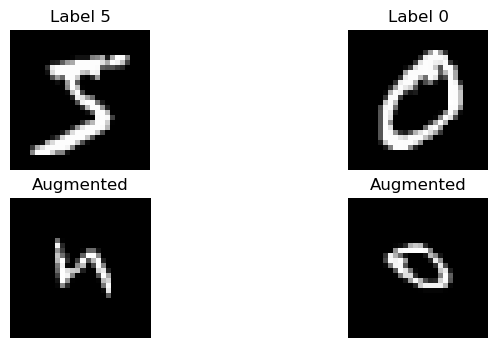

In [6]:
# Display original and augmented images
num_images = 2

plt.figure(figsize=(8, 4))
for i in range(num_images):
    # Original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

    # Augmented image
    augmented_img = augment_image(x_train[i])
#     augmented_img = augmented_img.numpy()[:, :, 0]
    
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(augmented_img, cmap='gray')
    plt.title(f"Augmented")
    plt.axis('off')

plt.show()

In [7]:
# Create empty lists to store augmented data
augmented_images_list = []
augmented_labels_list = []

# Iterate through the original training data
for i in range(len(x_train)):
    # Augment the image
    augmented_img = augment_image(x_train[i])

    # Append original and augmented data to the lists
    augmented_images_list.append(x_train[i])
    augmented_labels_list.append(y_train[i])

    augmented_images_list.append(augmented_img)
    augmented_labels_list.append(y_train[i])

# Convert lists to NumPy arrays
augmented_x_train = np.array(augmented_images_list)
augmented_y_train = np.array(augmented_labels_list)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Reshapes the input matrix (28x28) to a vector (784x1)
    tf.keras.layers.Dense(128, activation='relu'),#This specifies the hidden layer, with 128 nodes
    tf.keras.layers.Dropout(0.2),                 #This sets 20% of the inputs to 0, to prevent overfitting
    tf.keras.layers.Dense(10,activation='softmax')#Output layer, it has 10 nodes as there are 10 digits
                                                  #softmax gives probabilities for each digit, which adds up to 1.
])

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(augmented_x_train, augmented_y_train, epochs=20)

Epoch 1/20
3750/3750 [==============================] - 3s 664us/step - loss: 0.6832 - accuracy: 0.7836
Epoch 2/20
3750/3750 [==============================] - 3s 674us/step - loss: 0.4056 - accuracy: 0.8776
Epoch 3/20
3750/3750 [==============================] - 2s 633us/step - loss: 0.3309 - accuracy: 0.8996
Epoch 4/20
3750/3750 [==============================] - 2s 644us/step - loss: 0.2930 - accuracy: 0.9115
Epoch 5/20
3750/3750 [==============================] - 2s 579us/step - loss: 0.2675 - accuracy: 0.9181
Epoch 6/20
3750/3750 [==============================] - 2s 585us/step - loss: 0.2516 - accuracy: 0.9229
Epoch 7/20
3750/3750 [==============================] - 2s 582us/step - loss: 0.2370 - accuracy: 0.9275
Epoch 8/20
3750/3750 [==============================] - 2s 577us/step - loss: 0.2293 - accuracy: 0.9285
Epoch 9/20
3750/3750 [==============================] - 2s 583us/step - loss: 0.2189 - accuracy: 0.9323
Epoch 10/20
3750/3750 [==============================] - 2s 622u

In [11]:
model.evaluate(x_test, y_test) #This returns the loss and accuracy. Loss is the discrepancy between true label and
                               #predicted label. Lower is better. Accuracy is proportion of correct predictions.

313/313 [==============================] - 0s 398us/step - loss: 0.1335 - accuracy: 0.9718


[0.13346832990646362, 0.9718000292778015]

1/1 [==============================] - 0s 12ms/step


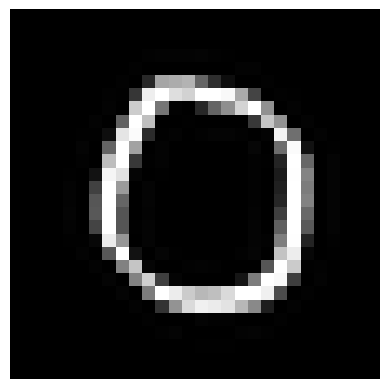

Predicted Probabilities:
Digit 0: P = 1.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 0
1/1 [==============================] - 0s 14ms/step


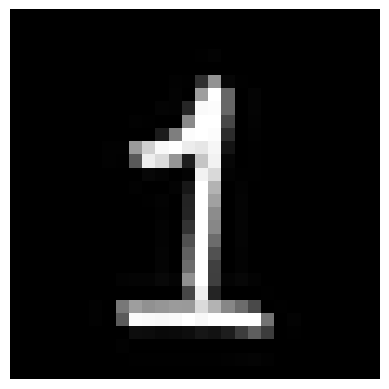

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 1.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 1
1/1 [==============================] - 0s 12ms/step


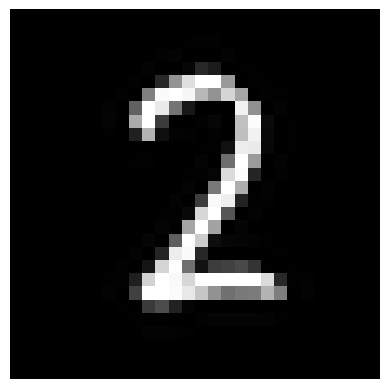

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 1.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 2
1/1 [==============================] - 0s 13ms/step


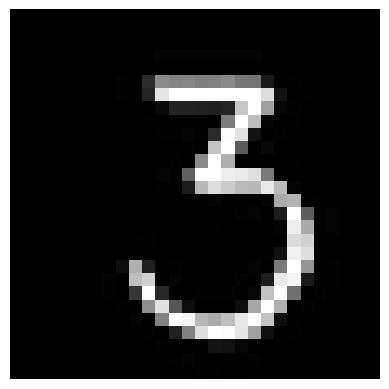

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 1.00
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 3
1/1 [==============================] - 0s 12ms/step


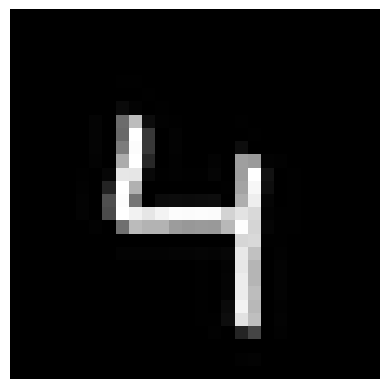

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 1.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 4
1/1 [==============================] - 0s 12ms/step


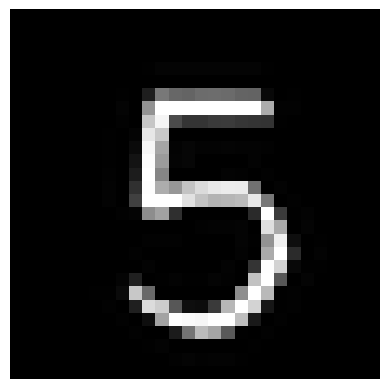

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 1.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 5
1/1 [==============================] - 0s 13ms/step


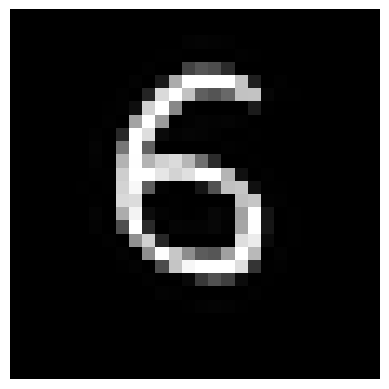

Predicted Probabilities:
Digit 0: P = 0.76
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.23
Digit 6: P = 0.01
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 0
1/1 [==============================] - 0s 11ms/step


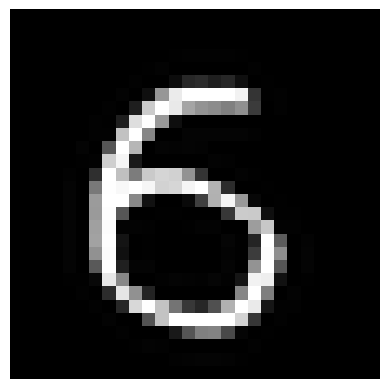

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.99
Digit 6: P = 0.01
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 5
1/1 [==============================] - 0s 12ms/step


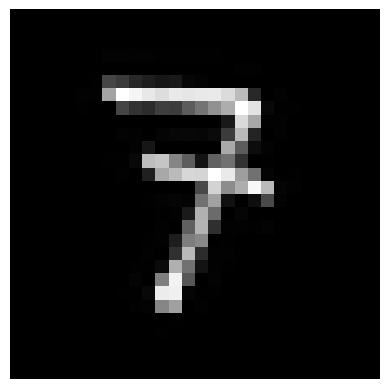

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.01
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.99
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 7
1/1 [==============================] - 0s 12ms/step


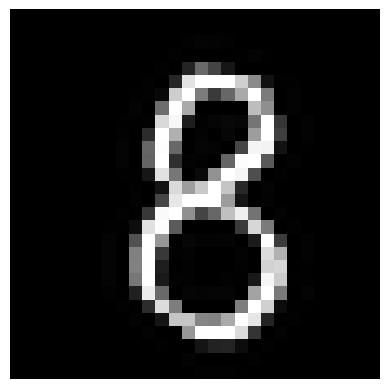

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 1.00
Digit 9: P = 0.00
Predicted Label: 8
1/1 [==============================] - 0s 12ms/step


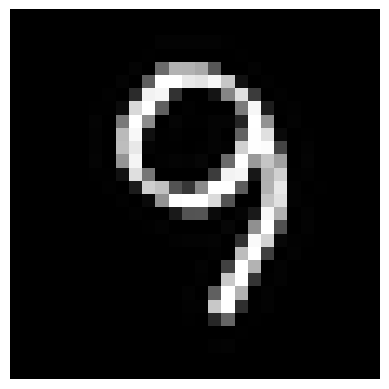

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.02
Digit 4: P = 0.00
Digit 5: P = 0.00
Digit 6: P = 0.00
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.98
Predicted Label: 9
1/1 [==============================] - 0s 12ms/step


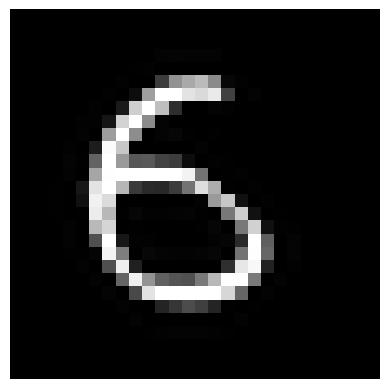

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.53
Digit 6: P = 0.47
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 5
1/1 [==============================] - 0s 12ms/step


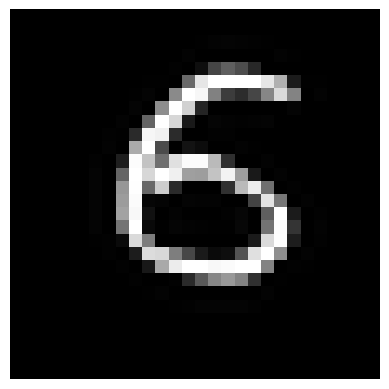

Predicted Probabilities:
Digit 0: P = 0.00
Digit 1: P = 0.00
Digit 2: P = 0.00
Digit 3: P = 0.00
Digit 4: P = 0.00
Digit 5: P = 0.21
Digit 6: P = 0.78
Digit 7: P = 0.00
Digit 8: P = 0.00
Digit 9: P = 0.00
Predicted Label: 6


In [14]:
# Function to handle mouse movements
def on_mouse_drag(event):
    x1, y1 = (event.x - 6), (event.y - 6)
    x2, y2 = (event.x + 6), (event.y + 6)
    canvas.create_rectangle(x1, y1, x2, y2, fill="white", width=8)
    draw.line([x1, y1, x2, y2], fill="white", width=8)

# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle((0, 0, 280, 280), fill="black")

# Function to get the pixel information from the canvas
def get_pixel_data():
    image = img.resize((28, 28), Image.LANCZOS).convert('L')
    pixel_data = np.array(image)
    return pixel_data


# Tkinter setup
root = tk.Tk()
root.title("Digit Drawer")

# Create a canvas
canvas = tk.Canvas(root, width=280, height=280, bg="black")
canvas.pack(expand=tk.YES, fill=tk.BOTH)

# Create a PIL Image and a draw object
img = Image.new("RGB", (280, 280), color="black")
draw = ImageDraw.Draw(img)

# Bind mouse events
canvas.bind("<B1-Motion>", on_mouse_drag)

def get_normalized_pixel_data(img):
    # Resize the image to (28, 28) using Lanczos interpolation
    image = img.resize((28, 28), Image.LANCZOS).convert('L')
    # Convert the resized image to a NumPy array
    pixel_data = np.array(image)
    # Normalize pixel values to be in the range [0, 1]
    normalized_pixel_data = pixel_data.astype(np.float32) / 255.0
    return normalized_pixel_data


def make_prediction(model, input_data):
    # Reshape the input data to match the model's input shape
    input_data = np.expand_dims(input_data, axis=0)
    # Make predictions
    predictions = model.predict(input_data)
    # Return the predicted class probabilities
    return predictions


# Function to make predictions
def make_and_display_prediction():
    normalized_pixel_data = get_normalized_pixel_data(img)
    predictions = make_prediction(model, normalized_pixel_data)
    
    plt.figure()
    plt.imshow(normalized_pixel_data, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Predicted Probabilities:")
    for i in range(len(predictions[0])):
        formatted_prob = "{:.2f}".format(predictions[0][i])
        print(f"Digit {i}: P = {formatted_prob}")


    highest = 0
    label = 0
    for i, prob in enumerate(predictions[0]):
        if round(prob, 2) > highest:
            highest = round(prob, 2)
            label = i

    print(f"Predicted Label: {label}")


# Create buttons
clear_button = tk.Button(root, text="Clear", command=clear_canvas)
clear_button.pack(side=tk.LEFT)

evaluate_button = tk.Button(root, text="Evaluate", command=make_and_display_prediction)
evaluate_button.pack(side=tk.RIGHT)

# Run the Tkinter event loop
root.mainloop()
